In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stocks/AAPL.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11052 non-null  object 
 1   Open       11052 non-null  float64
 2   High       11052 non-null  float64
 3   Low        11052 non-null  float64
 4   Close      11052 non-null  float64
 5   Adj Close  11052 non-null  float64
 6   Volume     11052 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 604.5+ KB


### Using the Interquartile Range (IQR) Method

In [ ]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers)

Outliers in Open:
             Date        Open        High         Low       Close   Adj Close  \
9492   2018-08-03   51.757500   52.185001   51.369999   51.997501   49.373066   
9493   2018-08-06   52.000000   52.312500   51.767502   52.267502   49.629436   
9494   2018-08-07   52.330002   52.375000   51.689999   51.777500   49.164177   
9495   2018-08-08   51.512501   51.952499   51.130001   51.812500   49.197395   
9496   2018-08-09   52.382500   52.445000   51.799999   52.220001   49.584335   
...           ...         ...         ...         ...         ...         ...   
11047  2024-10-09  225.229996  229.750000  224.830002  229.539993  229.539993   
11048  2024-10-10  227.779999  229.500000  227.169998  229.039993  229.039993   
11049  2024-10-11  229.300003  229.410004  227.339996  227.550003  227.550003   
11050  2024-10-14  228.699997  231.729996  228.600006  231.300003  231.300003   
11051  2024-10-15  233.610001  237.490005  232.369995  233.850006  233.850006   

         

**Open, High, Low, Close, Adj Close:** Each of these columns has multiple rows flagged as outliers, suggesting significant deviations from the normal range of values. The number of rows with outliers varies, but the presence across different dates and value ranges indicates notable anomalies.

**Volume:** There are extreme variations in the Volume column, with some values being unusually high, indicating sporadic spikes in trading activity, which are common outliers in financial data.

### Using Z-Score

In [ ]:
from scipy.stats import zscore

z_scores = df[numeric_cols].apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)
print("Outliers detected using Z-score:")
print(df[outliers.any(axis=1)])


Outliers detected using Z-score:
             Date        Open        High         Low       Close   Adj Close  \
703    1983-09-23    0.111607    0.111607    0.099330    0.108259    0.083457   
2054   1989-01-27    0.341518    0.350446    0.323661    0.335938    0.262482   
2612   1991-04-15    0.551339    0.575893    0.535714    0.555804    0.444918   
2624   1991-05-01    0.428571    0.437500    0.419643    0.421875    0.337709   
3183   1993-07-16    0.254464    0.264509    0.236607    0.245536    0.200554   
...           ...         ...         ...         ...         ...         ...   
11047  2024-10-09  225.229996  229.750000  224.830002  229.539993  229.539993   
11048  2024-10-10  227.779999  229.500000  227.169998  229.039993  229.039993   
11049  2024-10-11  229.300003  229.410004  227.339996  227.550003  227.550003   
11050  2024-10-14  228.699997  231.729996  228.600006  231.300003  231.300003   
11051  2024-10-15  233.610001  237.490005  232.369995  233.850006  233.85000

### Using Visualization

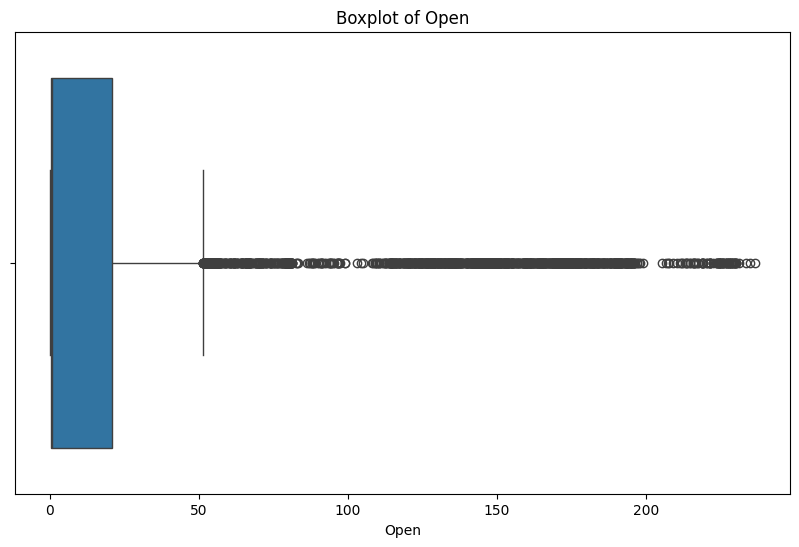

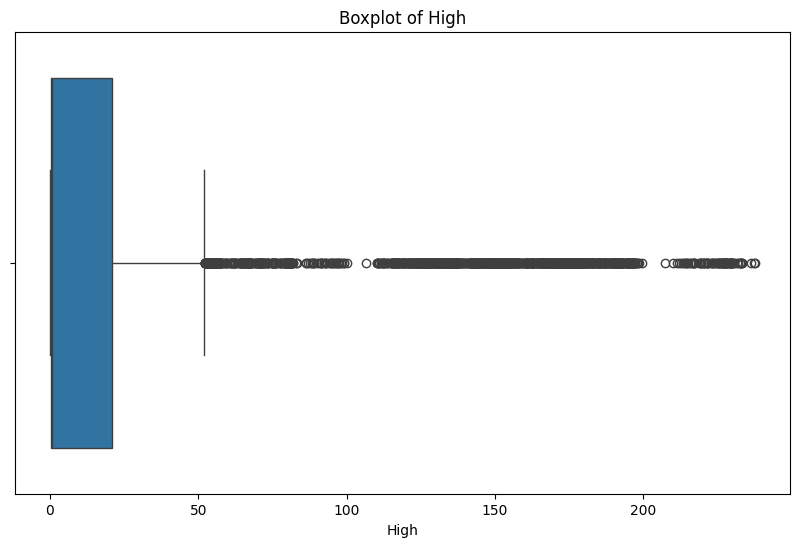

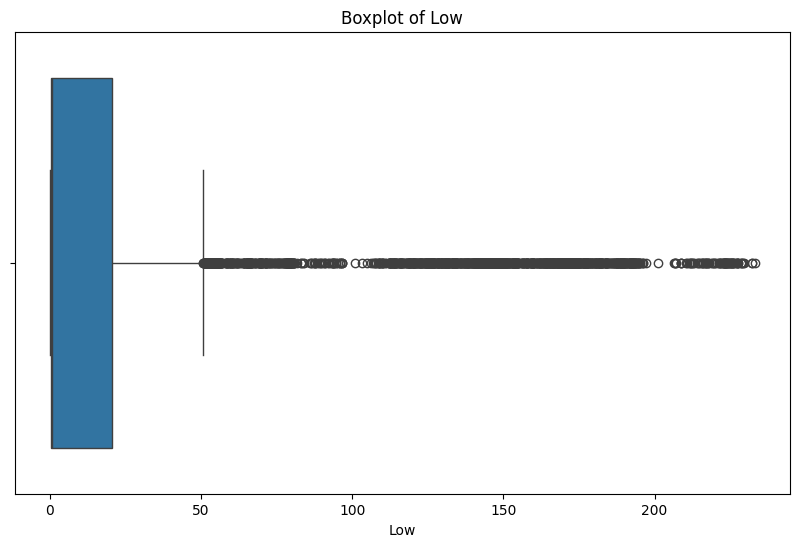

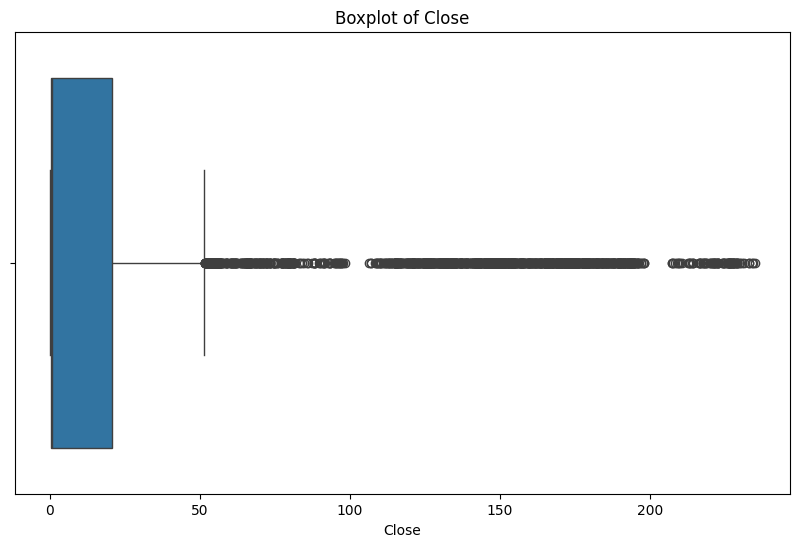

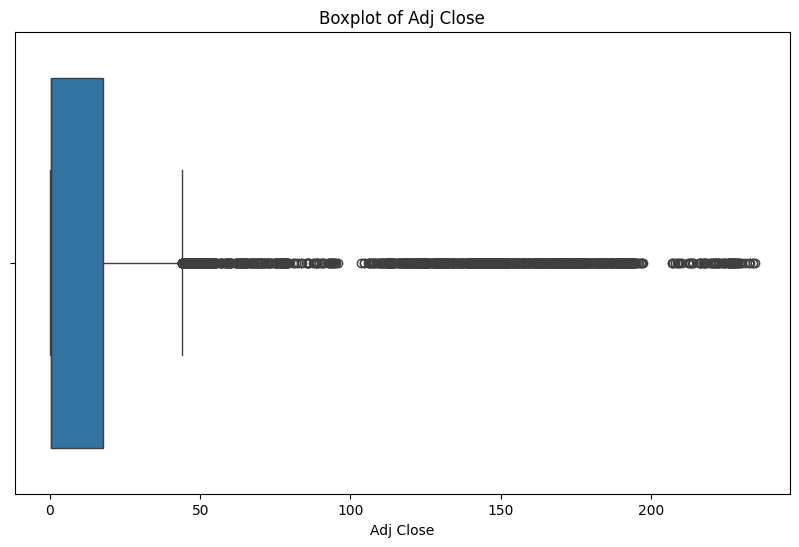

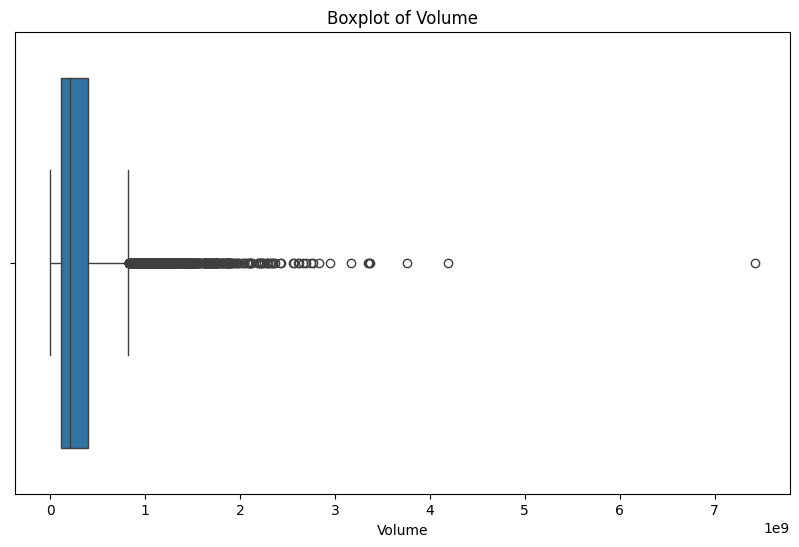

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
print(df[numeric_cols].describe())


               Open          High           Low         Close     Adj Close  \
count  11052.000000  11052.000000  11052.000000  11052.000000  11052.000000   
mean      23.280916     23.530883     23.040994     23.296521     22.482082   
std       47.984688     48.495685     47.505283     48.024875     47.587395   
min        0.049665      0.049665      0.049107      0.049107      0.037856   
25%        0.299107      0.305804      0.292411      0.299107      0.242678   
50%        0.535714      0.544643      0.527902      0.535714      0.437391   
75%       20.686429     20.981874     20.440446     20.781785     17.660468   
max      236.479996    237.490005    233.089996    234.820007    234.548523   

             Volume  
count  1.105200e+04  
mean   3.167836e+08  
std    3.351551e+08  
min    0.000000e+00  
25%    1.122195e+08  
50%    2.045214e+08  
75%    3.975706e+08  
max    7.421641e+09  


### Transformation

In [ ]:
df_aapl=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stocks/AAPL.csv')

In [ ]:
skewness_before = df_aapl[['Open', 'High', 'Low', 'Adj Close', 'Volume']].skew()

In [ ]:
print("Skewness Before Transformation:\n", skewness_before)

Skewness Before Transformation:
 Open         2.504632
High         2.502208
Low          2.506714
Adj Close    2.550677
Volume       3.565699
dtype: float64


In [ ]:
from scipy import stats

df_aapl['Open_boxcox'], _ = stats.boxcox(df_aapl['Open'] + 1)
df_aapl['High_boxcox'], _ = stats.boxcox(df_aapl['High'] + 1)
df_aapl['Low_boxcox'], _ = stats.boxcox(df_aapl['Low'] + 1)
df_aapl['Adj Close_boxcox'], _ = stats.boxcox(df_aapl['Adj Close'] + 1)
df_aapl['Close_boxcox'], _ = stats.boxcox(df_aapl['Close'] + 1)

skewness_after_boxcox = df_aapl[['Open_boxcox', 'High_boxcox', 'Low_boxcox', 'Adj Close_boxcox', 'Close_boxcox']].skew()

print("Skewness After Box-Cox Transformation:")
print(skewness_after_boxcox)

Skewness After Box-Cox Transformation:
Open_boxcox         0.435237
High_boxcox         0.433381
Low_boxcox          0.437331
Adj Close_boxcox    0.458762
Close_boxcox        0.435275
dtype: float64


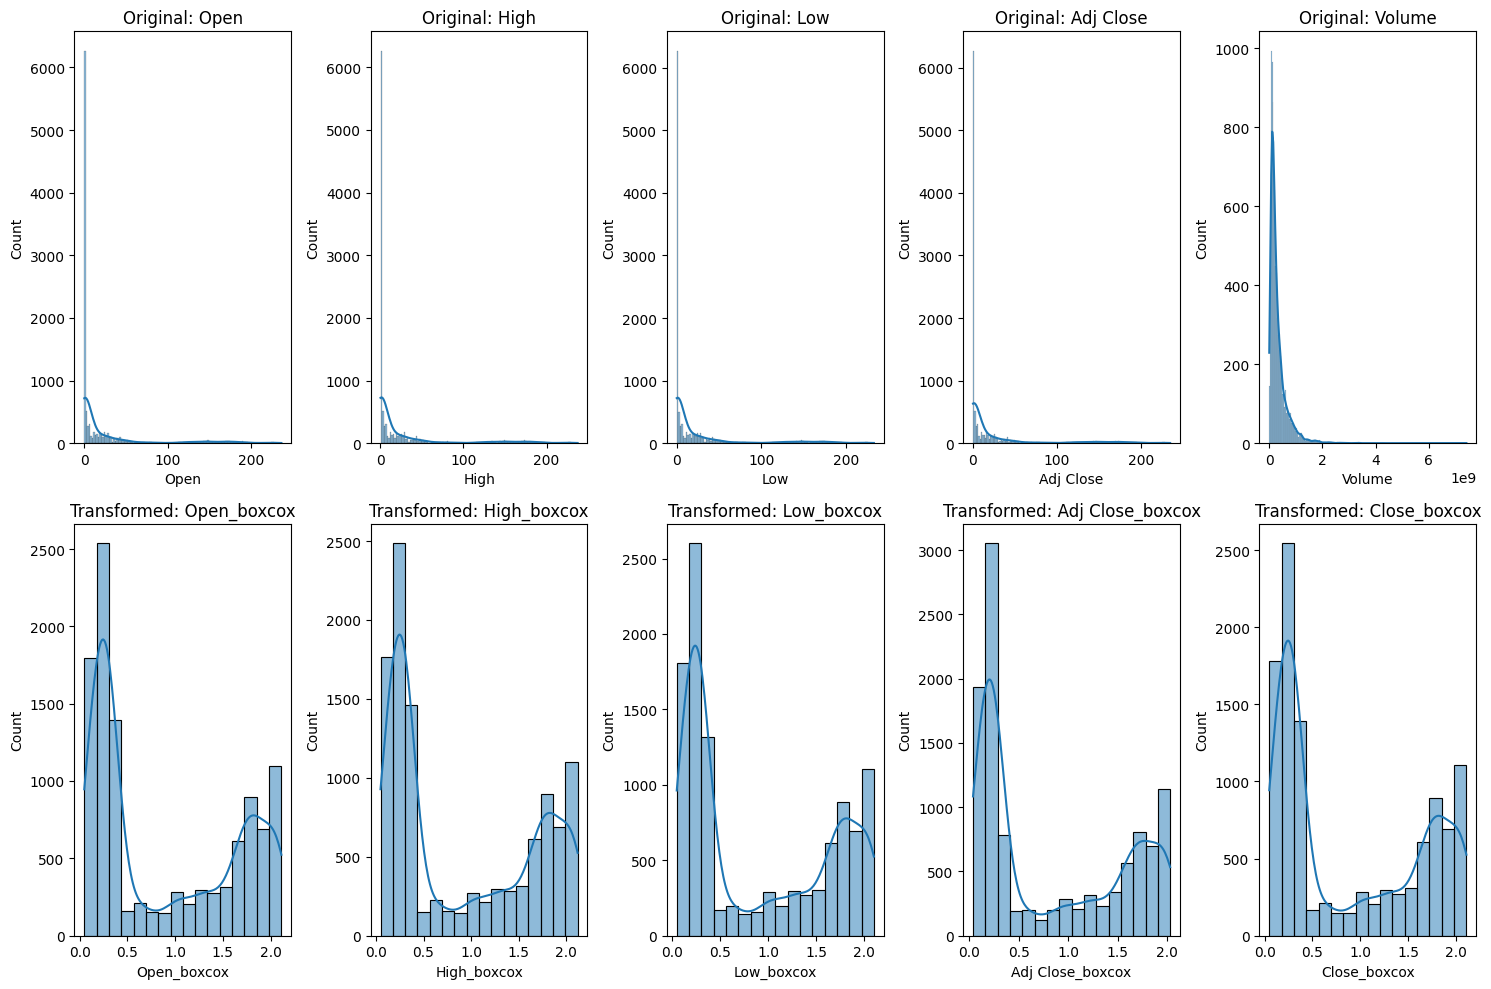

Skewness Before Transformation:
 Open         2.504632
High         2.502208
Low          2.506714
Adj Close    2.550677
Volume       3.565699
dtype: float64
Skewness After Box-Cox Transformation:
 Open_boxcox         0.435237
High_boxcox         0.433381
Low_boxcox          0.437331
Adj Close_boxcox    0.458762
Close_boxcox        0.435275
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 5, figsize=(15, 10))

original_columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
transformed_columns = ['Open_boxcox', 'High_boxcox', 'Low_boxcox', 'Adj Close_boxcox', 'Close_boxcox']

for i, col in enumerate(original_columns):
    sns.histplot(df_aapl[col], kde=True, ax=axes[0, i])
    axes[0, i].set_title(f'Original: {col}')

for i, col in enumerate(transformed_columns):
    sns.histplot(df_aapl[col], kde=True, ax=axes[1, i])
    axes[1, i].set_title(f'Transformed: {col}')

plt.tight_layout()
plt.show()

print("Skewness Before Transformation:\n", skewness_before)
print("Skewness After Box-Cox Transformation:\n", skewness_after_boxcox)


In [ ]:
df_aapl.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_boxcox,High_boxcox,Low_boxcox,Adj Close_boxcox,Close_boxcox
count,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,1.105200e+04,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000
mean,23.280916,23.530883,23.040994,23.296521,22.482082,3.167836e+08,0.882225,0.887655,0.876437,0.826142,0.882185
std,47.984688,48.495685,47.505283,48.024875,47.587395,3.351551e+08,0.746596,0.748290,0.744585,0.728285,0.746608
min,0.049665,0.049665,0.049107,0.049107,0.037856,0.000000e+00,0.047972,0.047974,0.047449,0.036849,0.047451
25%,0.299107,0.305804,0.292411,0.299107,0.242678,1.122195e+08,0.247565,0.252223,0.242872,0.206987,0.247565
50%,0.535714,0.544643,0.527902,0.535714,0.437391,2.045214e+08,0.391940,0.396924,0.387514,0.334762,0.391939
75%,20.686429,20.981874,20.440446,20.781785,17.660468,3.975706e+08,1.710951,1.718670,1.703328,1.626872,1.712095
max,236.479996,237.490005,233.089996,234.820007,234.548523,7.421641e+09,2.112793,2.120515,2.103236,2.032216,2.112060


In [ ]:

z_scores_original = stats.zscore(df_aapl[['Open', 'High', 'Low', 'Adj Close', 'Close']])

outliers_original = (z_scores_original > 3) | (z_scores_original < -3)
outliers_original_indices = df_aapl[['Open', 'High', 'Low', 'Adj Close', 'Close']].index[outliers_original.any(axis=1)]

df_aapl.iloc[outliers_original_indices]


,Date,Open,High,Low,Close,Adj Close,Volume,Open_boxcox,High_boxcox,Low_boxcox,Adj Close_boxcox,Close_boxcox
10330,2021-12-01,167.479996,170.300003,164.529999,164.770004,162.292786,152052500,2.077159,2.085960,2.067434,1.998100,2.075290
10334,2021-12-07,169.080002,171.580002,168.339996,171.179993,168.606415,120405400,2.078212,2.086792,2.069952,2.001900,2.079519
10335,2021-12-08,172.130005,175.960007,170.699997,175.080002,172.447784,116998900,2.080180,2.089574,2.071471,2.004112,2.081984
10336,2021-12-09,174.910004,176.750000,173.919998,174.559998,171.935608,108923700,2.081932,2.090065,2.073497,2.003821,2.081660
10337,2021-12-10,175.210007,179.630005,174.690002,179.449997,176.752075,115402700,2.082118,2.091830,2.073974,2.006508,2.084655
...,...,...,...,...,...,...,...,...,...,...,...,...
11047,2024-10-09,225.229996,229.750000,224.830002,229.539993,229.539993,33591100,2.108067,2.117284,2.099768,2.030366,2.109861
11048,2024-10-10,227.779999,229.500000,227.169998,229.039993,229.039993,28183500,2.109167,2.117177,2.100768,2.030178,2.109649
11049,2024-10-11,229.300003,229.410004,227.339996,227.550003,227.550003,31759200,2.109815,2.117138,2.100841,2.029615,2.109013
11050,2024-10-14,228.699997,231.729996,228.600006,231.300003,231.300003,39882100,2.109560,2.118125,2.101373,2.031022,2.110602


In [ ]:
from scipy import stats

z_scores_boxcox = stats.zscore(df_aapl[['Open_boxcox', 'High_boxcox', 'Low_boxcox', 'Adj Close_boxcox', 'Close_boxcox']])

outliers_boxcox = (z_scores_boxcox > 3) | (z_scores_boxcox < -3)
outliers_boxcox_indices = df_aapl[['Open_boxcox', 'High_boxcox', 'Low_boxcox', 'Adj Close_boxcox', 'Close_boxcox']].index[outliers_boxcox.any(axis=1)]
df_aapl.iloc[outliers_boxcox_indices]


,Date,Open,High,Low,Close,Adj Close,Volume,Open_boxcox,High_boxcox,Low_boxcox,Adj Close_boxcox,Close_boxcox
